In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import seaborn as sns
import pandas as pd

sns.set_theme(context='paper', 
              style='darkgrid', 
              palette='deep', 
              font='sans-serif', 
              font_scale=1, 
              color_codes=True, 
              rc={'figure.figsize':(4,2.5)})

[scipy.stats](https://scipy.github.io/devdocs/reference/stats.html#module-scipy.stats)

<a id='stat'></a>

* [Эмпирическая функция распределения](#ECDF)
* [Выборочные функции](#Samplefunctions)
* [Аппроксимация распределения](#approx)
* [Многомерное нормальное распределение](#ndim)
* [Ковариационная матрица](#cov)
* [Энтропия](#entropy)
* [Перекрёстная энтропия](#crossentropy)
* [Дивиргенция Кульбака-Лейблера](#kld)
* [Монте-Карло](#mc)
* [Центральная предельная теорема](#clt)

<a id='ECDF'></a>
## [Эмпирическая функция распределения](https://www.youtube.com/watch?v=-ptB3d2qJlw&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=8)
[Top](#stat)

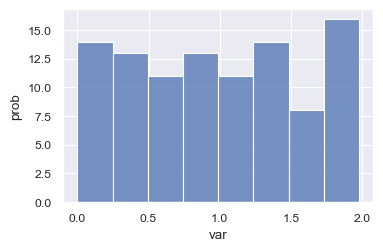

In [26]:
np.random.seed(1)
x = st.uniform.rvs(size=100, scale=2)
ax = sns.histplot(x);
ax.set(xlabel='var', ylabel='prob');

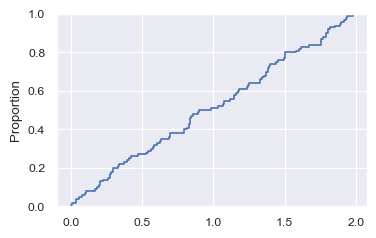

In [15]:
a = sns.ecdfplot(x);

In [16]:
# fetch data
d = a.get_lines()[0].get_data()
xx = d[0][1:]
yy = d[1][1:]
xx;

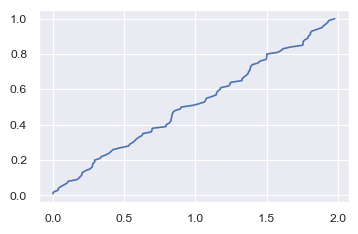

In [17]:
sns.lineplot(x=xx, y=yy);

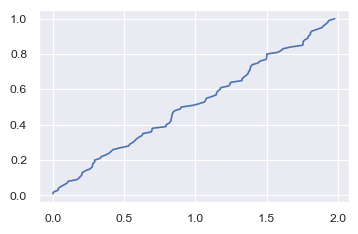

In [18]:
# manually
# np.fromiter((x[x<=el].size for el in x), dtype=float)/l
fm = np.array([x[x<=el].size for el in x])/x.size
sns.lineplot(x=x, y=fm);

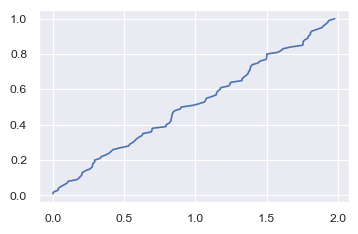

In [5]:
# thru ranking
fmr = pd.Series(x).rank(pct=True, method='first')
sns.lineplot(x=x, y=fmr);

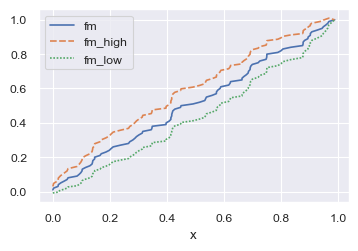

In [28]:
# CI
sd = np.sqrt(fm*(1-fm)/x.size)
fm_high = fm + 1.96*sd
fm_low = fm - 1.96*sd

f = pd.DataFrame({'x': x, 'fm': fm, 'fm_high': fm_high, 'fm_low': fm_low})\
    .set_index('x')
# f.head(3)

sns.lineplot(data=f);

<a id='Samplefunctions'></a>
## [Выборочные функции](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_(%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8))
[Top](#stat)

$ {\circ } $ смещенный центральный момент k-го порядка

$ {\displaystyle {\overset {\circ }{M}}_{k}={\frac {1}{m}}\sum _{i=1}^{m}\left(x_{i}-{\bar {x}}\right)^{k}}. $

$ {\bullet } $ Несмещённые оценки центральных моментов:

$
{\displaystyle {\overset {\bullet }{M}}_{2}={\frac {m}{m-1}}{\overset {\circ }{M}}_{2}};
$

$
{\displaystyle {\overset {\bullet }{M}}_{3}={\frac {m^{2}}{(m-1)(m-2)}}{\overset {\circ }{M}}_{3}};
$

$
{\displaystyle {\overset {\bullet }{M}}_{4}={\frac {m(m^{2}-2m+3){\overset {\circ }{M}}_{4}+3m(2m-3){\overset {\circ }{M}}_{2}^{2}}{(m-1)(m-2)(m-3)}}}.
$

### Асимметрия

$ {\displaystyle \gamma _{1}={\frac {{\overset {\bullet }{M}}_{3}}{{\overset {\bullet }{M}}_{2}^{3/2}}}={\frac {\sqrt {m(m-1)}}{m-2}}\left({\frac {{\overset {\circ }{M}}_{3}}{{\overset {\circ }{M}}_{2}^{3/2}}}\right)}. $

### Эксцесс

$ {\displaystyle \gamma _{2}={\frac {{\overset {\bullet }{M}}_{4}}{{\overset {\bullet }{M}}_{2}^{2}}}-3={\frac {m^{2}-1}{(m-2)(m-3)}}\left({\frac {{\overset {\circ }{M}}_{4}}{{\overset {\circ }{M}}_{2}^{2}}}-3+{\frac {6}{m+1}}\right)}. $

In [77]:
skew = (np.sqrt(n*(n-1))/(n-2)/(n))*(np.power(log_ret-log_ret.mean(), 3).sum())/np.power(log_ret.std(ddof=0), 3)
skew

0.23850943363982122

In [78]:
kurt = ((n**2-1)/(n-2)/(n-3))*((np.power(log_ret-log_ret.mean(), 4).sum())/n/np.power(log_ret.std(ddof=0), 4)
                                 - 3 + 6/(n+1))
kurt

0.8914128952927222

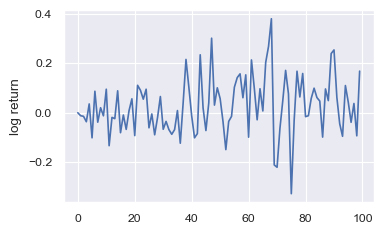

In [79]:
np.random.seed(1)
n = 100
u = .0005
s = .02
t = np.arange(n)
N_0_1 = np.random.normal(loc=0, scale=1, size=n)
drift = (u-0.5*s**2)
log_ret = drift*t + s*np.sqrt(t)*N_0_1
ax = sns.lineplot(x=t, y=log_ret);
ax.set(xlabel='', ylabel='log return');
# sns.lineplot(x=x1, y=y1, color='red', alpha=0.5, linewidth=1, marker='', linestyle='--');

In [80]:
log_ret_pd = pd.Series(log_ret)
mean = log_ret_pd.mean()
med = log_ret_pd.median()
std = log_ret_pd.std()
skew = log_ret_pd.skew()
kurt = log_ret_pd.kurt()
print(f'mean = {mean},\nmed = {med},\nstd = {std},\nskew = {skew},\nkurt = {kurt}')

mean = 0.02730158993744856,
med = 0.020193993512073544,
std = 0.1152661703414693,
skew = 0.2385094336398213,
kurt = 0.8914128952927234


<a id='approx'></a>
## [Аппроксимация эмпирического распределения теоретическими](https://rutube.ru/video/a1877ea619f416366ccaca8e827f3cd0/)
[Top](#stat)

### Распределение Лапласа (Laplace)

In [85]:
# MML estimating
loc_laplace = med
scale_laplace = (abs(log_ret_pd)-med).mean()

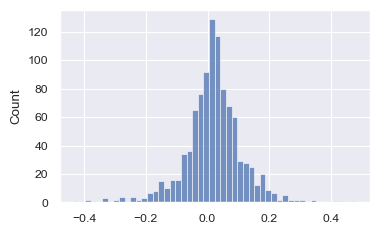

In [102]:
# np.random.seed(1)
x = st.laplace.rvs(size=1000, loc=loc_laplace, scale=scale_laplace)
ax = sns.histplot(x);

### Распределение Коши (Cauchy)
$ {\displaystyle {\frac {1}{\pi \gamma \,\left[1+\left({\frac {x-x_{0}}{\gamma }}\right)^{2}\right]}}\!} $

In [130]:
# MM estimating
loc_cauchy = med
scale_cauchy = (np.percentile(log_ret, q=75) - np.percentile(log_ret, q=25))/2
loc_cauchy, scale_cauchy

(0.020193993512073544, 0.06788563438410247)

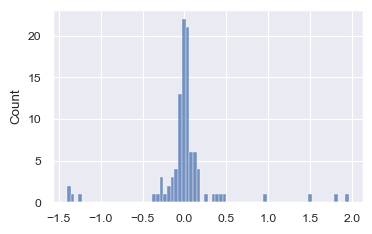

In [126]:
# np.random.seed(1)
x = st.cauchy.rvs(size=100, loc=loc_cauchy, scale=scale_cauchy)
ax = sns.histplot(x);

In [146]:
# MML estimating
def cauchy_mml(k):
    return -(np.log(1/(np.pi*k[1]*(1+((log_ret-k[0])/k[1])**2)))).sum()
res = opt.minimize(cauchy_mml, [loc_cauchy, scale_cauchy], method='powell')
loc_cauchy_mml = res.x[0]
scale_cauchy_mml = res.x[1]
loc_cauchy_mml, scale_cauchy_mml

C:\Users\Stan\AppData\Local\Temp\ipykernel_2504\3689594011.py:3: RuntimeWarning: invalid value encountered in log
  return -(np.log(1/(np.pi*k[1]*(1+((log_ret-k[0])/k[1])**2)))).sum()


(0.024465179322505914, 2.5644909846834087)

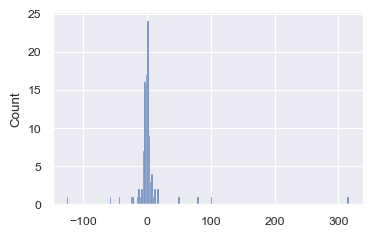

In [132]:
# np.random.seed(1)
x = st.cauchy.rvs(size=100, loc=loc_cauchy_mml, scale=scale_cauchy_mml)
ax = sns.histplot(x);

<a id='ndim'></a>
## [Многомерное нормальное распределение](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)
[Top](#stat)

In [44]:
x_ = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
c5 = np.identity(len(x_))
st.multivariate_normal.pdf(x_, cov=c5)

0.00019751566387207168

In [45]:
np.random.seed(0)
np.random.multivariate_normal(x_, cov=c5)

array([3.06405235, 1.10015721, 1.77873798, 4.1408932 , 3.06755799])

In [46]:
rng = np.random.RandomState(0)
rng.multivariate_normal(x_, cov=c5)

array([3.06405235, 1.10015721, 1.77873798, 4.1408932 , 3.06755799])

In [47]:
c2 = np.identity(2)
st.multivariate_normal.pdf([0,0], cov=c2)

0.15915494309189535

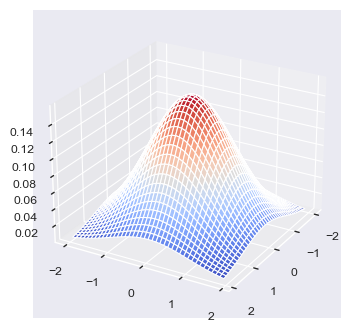

In [48]:
from matplotlib import cm

fig = plt.figure(figsize=[6, 4])
# ax = fig.gca(projection='3d')
ax = plt.axes(projection='3d')

# Задаем угол обзора
ax.view_init(25, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
xy = np.array([X,Y]).transpose([1,2,0])
c2 = np.identity(2)
Z = st.multivariate_normal.pdf(xy, cov=c2)

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show();

In [29]:
np.random.uniform(0,1,(5,3))

array([[0.82099323, 0.09710128, 0.83794491],
       [0.09609841, 0.97645947, 0.4686512 ],
       [0.97676109, 0.60484552, 0.73926358],
       [0.03918779, 0.28280696, 0.12019656],
       [0.2961402 , 0.11872772, 0.31798318]])

<a id='cov'></a>
## [Ковариационная матрица](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0)
[Top](#stat)

$ {\displaystyle \operatorname {\Sigma } =\operatorname {E} \left[\left(X-\operatorname {E} [X]\right)\left(X-\operatorname {E} [X]\right)^{\mathrm {T} }\right]} $,

$ {\mathbf  {Q}}={1 \over {n-1}}\sum _{{i=1}}^{n}(x_{i}-\overline {x})(x_{i}-\overline {x})^{{\mathrm  {T}}} $

array([[ 1.62434536, -0.61175641, -0.52817175, ..., -1.01414382,
        -0.06269623, -1.43786989],
       [-0.12247391,  0.22816982, -0.35230513, ...,  2.4084338 ,
         0.88278555, -0.09959631]])

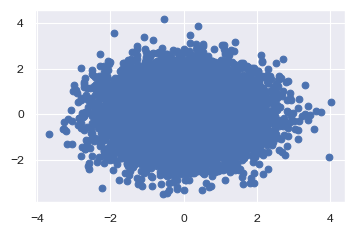

In [44]:
np.random.seed(1)
n = 10000
data = np.random.randn(2,n)
plt.scatter(data[0],data[1]);
data

array([[ 1.62434536, -0.61175641, -0.52817175, ..., -1.01414382,
        -0.06269623, -1.43786989],
       [-0.24494781,  0.45633964, -0.70461026, ...,  4.81686759,
         1.7655711 , -0.19919262]])

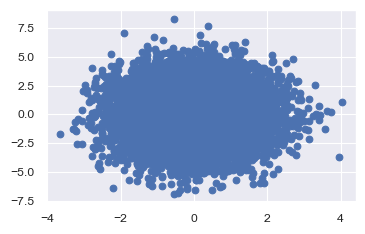

In [51]:
np.random.seed(1)
n = 10000
x = np.random.randn(n).reshape(1,n)
y = np.random.randn(n).reshape(1,n)*2
# y = x*2
plt.scatter(x,y);
data = np.concatenate((x,y), axis=0)
data

array([[0.4359949 , 0.02592623, 0.54966248, ..., 0.73417613, 0.77316319,
        0.17327333],
       [0.09041872, 0.5216695 , 1.71340863, ..., 0.01633743, 1.74172033,
        0.07798173]])

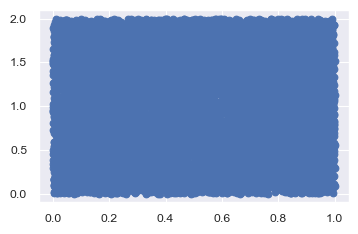

In [49]:
np.random.seed(2)
n = 10000
x = np.random.uniform(0,1,n).reshape(1,n)
y = np.random.uniform(0,2,n).reshape(1,n)
data = np.concatenate((x,y), axis=0)
plt.scatter(x,y);
data

In [53]:
# data_mean = data - E[data]
data_mean = data-data.mean(axis=1).reshape(2,1)
data_mean

array([[ 1.61457271, -0.62152907, -0.53794441, ..., -1.02391647,
        -0.07246888, -1.44764255],
       [-0.26381864,  0.43746881, -0.72348109, ...,  4.79799677,
         1.74670027, -0.21806345]])

In [55]:
# covariance_matr = (data_mean * data_mean.T)/(n-1)
covariance_matr = (data_mean@data_mean.T)/(n-1)
covariance_matr

array([[0.99767293, 0.0313707 ],
       [0.0313707 , 4.00992083]])

In [57]:
np.linalg.det(covariance_matr)

3.9996053429977043

In [59]:
# built-in
np.cov(data)

array([[0.99767293, 0.0313707 ],
       [0.0313707 , 4.00992083]])

In [61]:
# built-in
np.corrcoef(data)

array([[1.        , 0.01568419],
       [0.01568419, 1.        ]])

In [75]:
s = np.std(data, axis=1).reshape(2,1)
std_ = s@s.T
np.corrcoef(data) * std_

array([[0.99757316, 0.03136756],
       [0.03136756, 4.00951984]])

array([[1.        , 0.73422843],
       [0.73422843, 1.        ]])

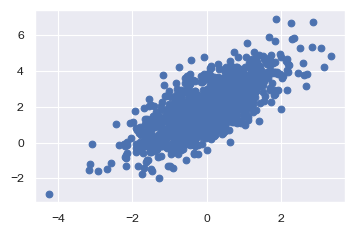

In [79]:
# np.random.seed(2)
n = 1000
x = np.random.randn(n).reshape(1,n)
y = x + (np.random.randn(n).reshape(1,n) + 2)
plt.scatter(x,y);
data = np.concatenate((x,y), axis=0)
np.corrcoef(data)

(array([[1.        , 0.89518153],
        [0.89518153, 1.        ]]),
 array([[ 3.90083866,  7.68111878],
        [ 7.68111878, 18.87420858]]))

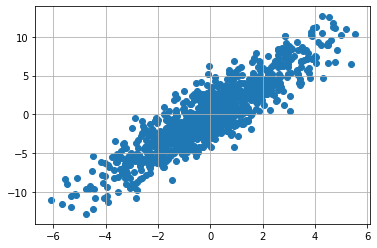

In [109]:
np.random.seed(0)
n = 1000
x0 = np.random.randn(n) * 2
x = x0.reshape(1,n)
y0 = np.random.randn(n) * 2
y = x*2 + (y0.reshape(1,n))*1
plt.grid()
plt.scatter(x,y);
data = np.concatenate((x,y), axis=0)
np.corrcoef(data), np.cov(data)

<a id='entropy'></a>
## [Энтропия](https://en.wikipedia.org/wiki/Entropy_(information_theory))
[Top](#stat)

$ {\displaystyle \mathrm {H} (X):=-\sum _{x\in {\mathcal {X}}}p(x)\log p(x)=\mathbb {E} [-\log p(X)],} $

In [6]:
n=1000
x = np.linspace(-1,1,n)
uni_form = st.uniform.pdf(x,-2,4)
p_uni_form = uni_form/uni_form.sum()
gauss_1 = st.norm.pdf(x)
p_gauss_1 = gauss_1/gauss_1.sum()
gauss_2 = st.norm.pdf(x, 0, 0.1)
p_gauss_2 = gauss_2/gauss_2.sum()

hp_uniform = -(p_uni_form*np.log(p_uni_form)).sum()
hp_gauss_1 = -(p_gauss_1*np.log(p_gauss_1)).sum()
hp_gauss_2 = -(p_gauss_2*np.log(p_gauss_2)).sum()

hp_uniform, hp_gauss_1, hp_gauss_2

(6.907755278982134, 6.897354106414488, 5.329961038299237)

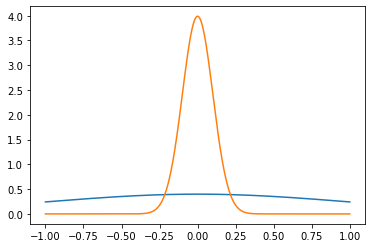

In [7]:
plt.plot(x,gauss_1);
plt.plot(x,gauss_2);

<a id='crossentropy'></a>
## [Перекрёстная энтропия](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B5%D0%BA%D1%80%D1%91%D1%81%D1%82%D0%BD%D0%B0%D1%8F_%D1%8D%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%B8%D1%8F#:~:text=%D0%92%20%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D0%B8%20%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%B8%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BA%D1%80%D1%91%D1%81%D1%82%D0%BD%D0%B0%D1%8F%20%D1%8D%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%B8%D1%8F,%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B8%20%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9.%2C%20%D0%B2%D0%BC%D0%B5%D1%81%D1%82%D0%BE%20%C2%AB%D0%B8%D1%81%D1%82%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%C2%BB%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F) 
### [eng](https://en.wikipedia.org/wiki/Cross_entropy)
[Top](#stat)


$ {\displaystyle H(p,q)=-\sum _{x\in {\mathcal {X}}}p(x)\,\log q(x) =-\operatorname {E} _{p}[\log q]=H(p)+D_{\mathrm {KL} }(p\parallel q),} $

In [8]:
h_cross_p_q = -(p_uni_form*np.log(p_gauss_2)).sum()
h_cross_q_p = -(p_gauss_2*np.log(p_uni_form)).sum()
h_cross_p_q, h_cross_q_p

(21.529994404999268, 6.907755278982138)

<a id='kld'></a>
## [Дивиргенция Кульбака-Лейблера](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)
[Top](#stat)

$ {\displaystyle D_{KL}(P\parallel Q)=\sum \limits _{i=1}^{n}p_{i}\log {\frac {p_{i}}{q_{i}}}={\displaystyle H(p,q)-H(p)}} $.

In [9]:
dkl_p_q = (p_uni_form*np.log(p_uni_form/p_gauss_2)).sum()
dkl_q_p = (p_gauss_2*np.log(p_gauss_2/p_uni_form)).sum()
dkl_p_q, dkl_q_p

(14.622239126017131, 1.5777942406829022)

#### or
$ {\displaystyle D_{KL}(P\parallel Q)={\displaystyle H(p,q)-H(p)}} $.

In [10]:
h_cross_p_q-hp_uniform, h_cross_q_p-hp_gauss_2

(14.622239126017135, 1.577794240682901)

Допустим у нас есть две механических машины, которые печатают сообщения из алфавита A,B,C,D.
Символы, печатаемые первой машиной, распределены равновероятно, то есть, появление каждого нового символа имеет вероятность 0.25.
Символы, печатаемые второй машиной, имеют иное распределение:
0.5, 0.125, 0.125, 0.25.

In [11]:
p = np.array([0.25, 0.25, 0.25, 0.25])
q = np.array([0.5, 0.125, 0.125, 0.25])
h_p = -(p*np.log(p)).sum()
h_q = -(q*np.log(q)).sum()
h_cross_p_q = -(p*np.log(q)).sum()
h_cross_q_p = -(q*np.log(p)).sum()
print(h_p, h_q)
print(h_cross_p_q, h_cross_q_p)

1.3862943611198906 1.2130075659799042
1.559581156259877 1.3862943611198906


В качестве первой идеи метрики может быть вариация на тему `L1` нормы в machine learning.
Другим вариантом являются `Kullback-Leibler` и `Jensen-Shannon` `divergences`, поскольку это более академически правильный подход для измерения расстояний между вероятностными распределениями.


In [1]:
import numpy as np
 
prev = np.array([0.7, 0.2, 0.1])
curr = np.array([0.6, 0.27, 0.13])

def get_kl_divergence(prev, curr):
    kl = prev * np.log(prev / curr)
    return np.sum(kl)

def get_js_divergence(prev, curr): 
    mean = (prev + curr)/2
    return 0.5*(get_kl_divergence(prev, mean) + get_kl_divergence(curr, mean))

kl = get_kl_divergence(prev, curr)
js = get_js_divergence(prev, curr)
print('KL divergence = %.4f, JS divergence = %.4f' % (kl, js))

# KL divergence = 0.0216, JS divergence = 0.0055

KL divergence = 0.0216, JS divergence = 0.0055


<a id='mc'></a>
## [Монте-Карло](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9C%D0%BE%D0%BD%D1%82%D0%B5-%D0%9A%D0%B0%D1%80%D0%BB%D0%BE)
[Top](#stat)

In [69]:
n = 4000
x = np.random.rand(n)*2-1
y = np.random.randn(n)
z = x*y**2
interv = z[(z<=1)&(z>=0)]
p = len(interv)/n
p
# plt.hist(o, bins=100);

0.40925

3.096

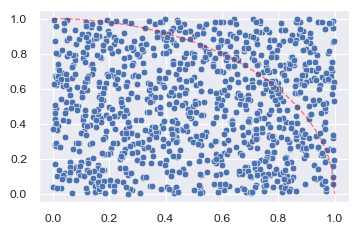

In [2]:
# pi calculation
n = 1000
x = np.random.rand(n)
y = np.random.rand(n)
x1 = np.linspace(0,1,100)
y1 = np.sqrt(1-x1**2)
sns.scatterplot(x=x, y=y);
sns.lineplot(x=x1, y=y1, color='red', alpha=0.5, linewidth=1, marker='', linestyle='--');
in_ = y[y<np.sqrt(1-x**2)]
pi_ = len(in_)*4/n
pi_

<a id='clt'></a>
## Центральная предельная теорема
[Top](#stat)

E = -1.6310011469757404, S = 6.097004794837794


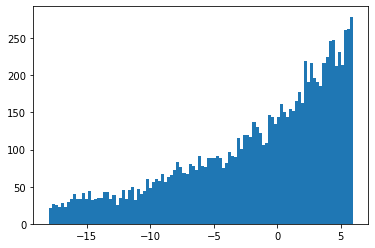

In [31]:
N = 10000
x = (np.log(np.random.rand(N)+.1))*10+5
print(f'E = {x.mean()}, S = {x.std()}')
plt.hist(x, bins=100);

E = -1.6111941399982403, S = 1.523346138436435


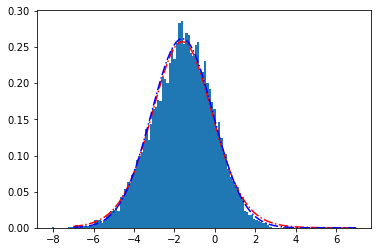

In [32]:
n = 16 # sample volume
m = 10000 # num of samples
x_ = np.array([np.random.choice(x, n).mean() for _ in range(m)])
E = x_.mean()
SE = x_.std()
print(f'E = {E}, S = {SE}')
plt.hist(x_, bins=100, density=True);
xx = np.linspace(int(E-4*SE), int(E+6*SE), 100)
plt.plot(xx, st.t.pdf(xx, n, loc=E, scale=SE), 'r-.');
plt.plot(xx, st.norm.pdf(xx, loc=E, scale=SE), 'b-.');

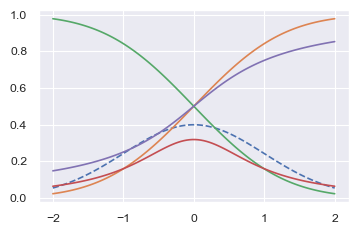

In [107]:
x = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(1,1)
# ax.grid()
plt.plot(x, st.norm.pdf(x), '--')
plt.plot(x, st.norm.cdf(x))
# survival function (функция надежности, живучести) = 1-cdf
plt.plot(x, st.norm.sf(x))
plt.plot(x, st.t.pdf(x,1))
plt.plot(x, st.t.cdf(x,1))
plt.show()

In [2]:
st.norm.cdf(100, 80, np.sqrt(76.8))-st.norm.cdf(60, 80, np.sqrt(80*0.96))

0.9775211266338748

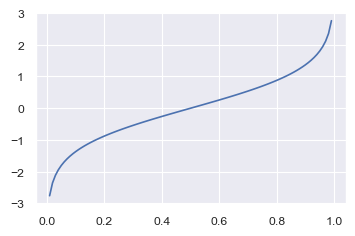

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

x = np.linspace(0, 1, 100)
fig, ax = plt.subplots(1,1)
# ax.grid()
# ppf - percent-point function, inverse to cdf
# ppf - probit or quantile function
plt.plot(x, st.t.ppf(x,10))
plt.show()

In [6]:
st.t.cdf(1.78,16)-st.t.cdf(-1.78,16)

0.9059273059780628

In [4]:
st.norm.cdf(100, 119.2, 9.35)-st.norm.cdf(94, 119.2, 9.35)

0.016495765512713364

In [5]:
# half of 95% confidence interval for t-distribution with 19 freedom degree & normal
p=0.95
st.t.ppf((1+p)/2, 16), st.norm.ppf((1+p)/2)

(2.119905299221011, 1.959963984540054)

In [74]:
# inverse
st.t.cdf(2.119905299221255,16), st.norm.cdf(1.959963984540054)

(0.975, 0.975)

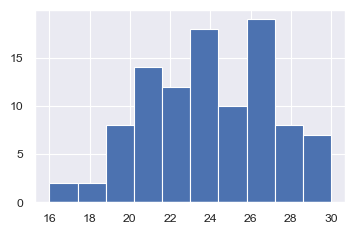

In [120]:
np.random.seed()
s = 100
n = 40
p = 0.6
b = st.binom(n, p=p).rvs(size=s)
plt.hist(b);

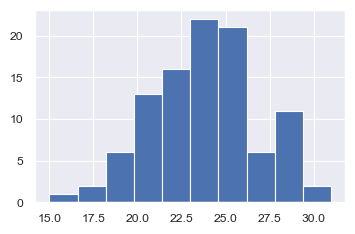

In [122]:
rng = np.random.RandomState()
s = 100
n = 40
p = 0.6
b = st.binom(n, p=p).rvs(size=s, random_state=rng)
plt.hist(b);

In [5]:
st.shapiro(b), st.normaltest(b), st.anderson(b)

(ShapiroResult(statistic=0.9792373180389404, pvalue=0.11591649800539017),
 NormaltestResult(statistic=2.0712148393186203, pvalue=0.3550106749563273),
 AndersonResult(statistic=0.7117846036415756, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])))

In [125]:
st.ttest_1samp(b, popmean=n*0.5)

TtestResult(statistic=12.442343679643763, pvalue=5.865011466233031e-22, df=99)

In [151]:
t = (b.mean()-n*0.5)*np.sqrt(s)/b.std(ddof=1)
pval = (st.t.cdf(-abs(t), df=s-1))*2
t, pval

(12.442343679643765, 5.865011466233031e-22)

In [162]:
st.binom.pmf(60, 100, 0.5)

0.010843866711637958

In [161]:
st.binom.pmf(500, 1000, 0.5)

0.025225018178360824

In [163]:
st.multinomial.pmf([1,3,2,4], n=10, p=[0.1, 0.3, 0.2, 0.4])

0.03483647999999988

#### [Multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution)
$ {\displaystyle {\begin{aligned}f(x_{1},\ldots ,x_{k};n,p_{1},\ldots ,p_{k})&{}=\Pr(X_{1}=x_{1}{\text{ and }}\dots {\text{ and }}X_{k}=x_{k})\\&{}={\begin{cases}{\displaystyle {n! \over x_{1}!\cdots x_{k}!}p_{1}^{x_{1}}\times \cdots \times p_{k}^{x_{k}}},\quad &{\text{when }}\sum _{i=1}^{k}x_{i}=n\\\\0&{\text{otherwise,}}\end{cases}}\end{aligned}}} $

In [4]:
import math
math.factorial(100)/(math.factorial(60)*math.factorial(40))*0.5**60*0.5**40

0.010843866711637987

0.01084386671163799 0.010843866711637149


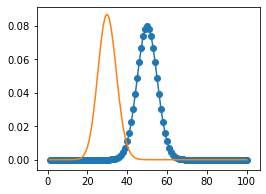

In [13]:
# find probability of coin face m times of n
n, m = 100, 60
p = 0.5
Cnm = np.arange(m+1,n+1, dtype=float).prod()/np.arange(1,n-m+1, dtype=float).prod()
pm = Cnm*p**m*(1-p)**(n-m)
sko = np.sqrt(n*p*(1-p))
print(pm, st.binom.pmf(m, n, p))
plt.figure( figsize=(4,3))
x = np.arange(1,101)
plt.plot(x, st.norm.pdf(x, n*p, sko))
plt.scatter(x, st.binom.pmf(x, n, p)*1.0)
plt.plot(x, st.binom.pmf(x, n, .3))
plt.show()

In [16]:
np.sqrt(1000*p*(1-p))

15.811388300841896

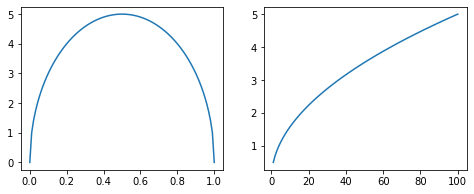

In [29]:
p = np.linspace(0,1,100)
n = np.arange(1,101)
n1, p1 = 100, 0.5
sko_p = np.sqrt(n1*p*(1-p))
sko_n = np.sqrt(n*p1*(1-p1))
fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].plot(p, sko_p)
ax[1].plot(n, sko_n)
plt.show()

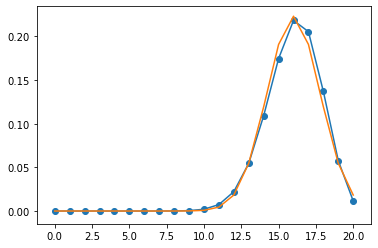

0.21819940194610007

In [46]:
n = 20
m = range(0, n+1)
p = 0.8
pm = list(map(lambda x: (np.arange(x+1,n+1, dtype=float).prod()/np.arange(1,n-x+1, dtype=float).prod() \
                    *p**x*(1-p)**(n-x)), m))
plt.plot(m, pm)
plt.scatter(m, st.binom.pmf(m, n, p))

sko = np.sqrt(n*p*(1-p))
plt.plot(m, st.norm.pdf(m, n*p, sko))
plt.show()
st.binom.pmf(m, n, p).max()

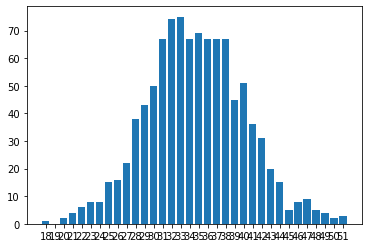

In [9]:
from random import randint

class Dice:
    def __init__(self, sides=6):
        self.sides = sides

    def throw(self, number_of_throws=1000, number_of_dices=10):
        dice_values = [0] * number_of_throws
        for i in range(number_of_throws):
            for j in range(number_of_dices):
                dice_values[i] += randint(1, self.sides)
        values_range = range(min(dice_values), max(dice_values)+1)
        return {i: dice_values.count(i) for i in values_range}


def gist_plot(data):
    sort = sorted(data)
    y = tuple(data[i] for i in sort)
    x = range(sort[0], sort[-1]+1)
    ax = plt.gca()
    ax.bar(x, y, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    plt.show()

dice = Dice()
gist_plot(dice.throw())

In [53]:
array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]
np.array(array2).mean()

75.73499999999999

In [5]:
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']
df

,Mx,SD,N,SE
Выборка1,100.815,10.246503,20.0,2.291188
Выборка2,75.735,15.458102,20.0,3.456537


               Mx         SD     N        SE
Выборка1  100.815  10.246503  20.0  2.291188
Выборка2   75.735  15.458102  20.0  3.456537
[2.09302405 2.09302405]


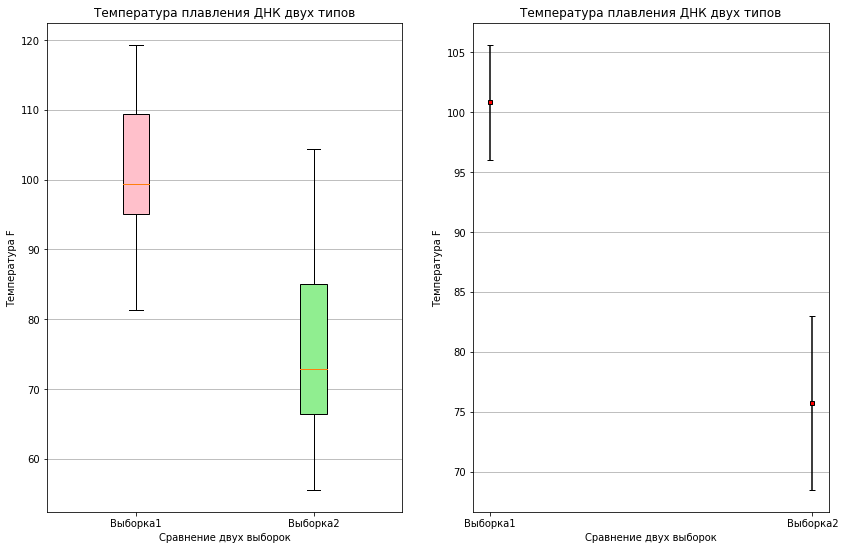

In [1]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']
print(df)
# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['N']-1)
print(K)
df['interval'] = K * df['SE']

#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

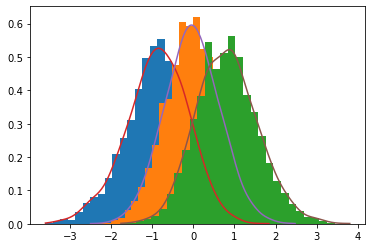

In [30]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


def get_gaussian_density(dataset):
    ''' Гауссово распределение, полученное на основе выборки

        :param dataset: массив значений
    '''

    density = ss.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density




mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины


# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)


# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')


# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)


plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))


plt.show()

In [48]:
r = np.random.normal(mu, sigma, 10)
rr = (sorted(np.random.choice(rnd, 3)) for i in range(4))
list(zip(*rr))

[(-0.231244140399901,
  -1.1231291356290047,
  0.13348184986514586,
  -0.6505016220577222),
 (0.7761466990139712,
  -0.3922173303028958,
  0.196625832413688,
  -0.3926372878575584),
 (1.5472401792006725,
  0.01828342981137096,
  1.3841227788986723,
  1.0146209574956773)]